# Разведывательный анализ данных (Exploratory Data Analysis) #

## Полезные настройки для графики ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
# print(plt.style.available)
plt.style.use('seaborn-v0_8-notebook')
import warnings
warnings.filterwarnings('ignore')

## Построение разных графиков ##

### Линейные графики ###

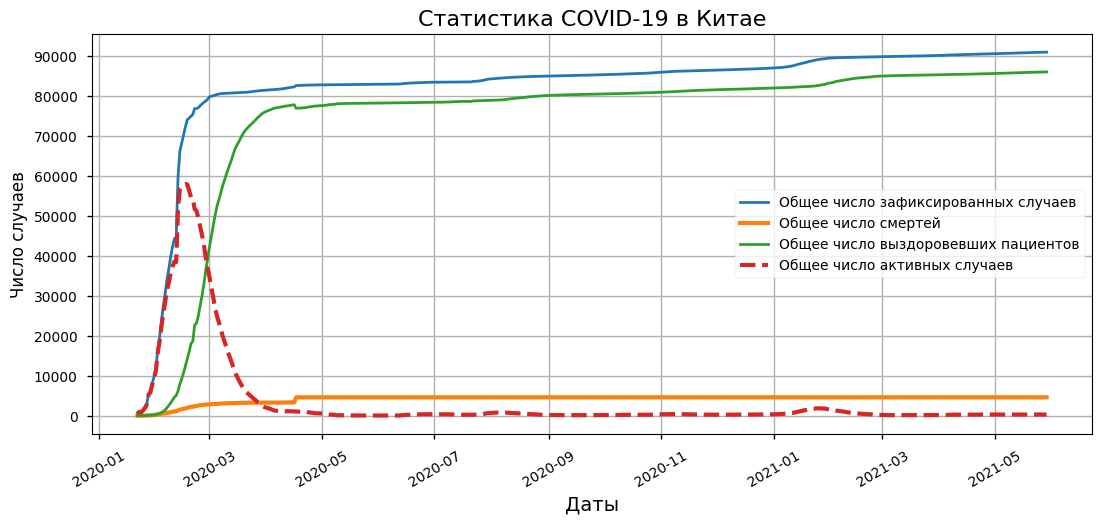

In [2]:
data2_df = pd.read_csv('data/data2_covid.csv', sep=',')
data2_df = data2_df.groupby(['date', 'country'], as_index=False)[['confirmed', 'deaths', 'recovered']].sum()
data2_df['date'] = pd.to_datetime(data2_df['date'])
data2_df['active'] = data2_df['confirmed'] - data2_df['deaths'] - data2_df['recovered']
data2_df = data2_df.sort_values(by=['country', 'date'])
data2_df['daily_confirmed'] = data2_df.groupby('country')['confirmed'].diff()
data2_df['daily_deaths'] = data2_df.groupby('country')['deaths'].diff()
data2_df['daily_recovered'] = data2_df.groupby('country')['recovered'].diff()
data3_df = pd.read_csv('data/data3_vaccin.csv', sep=',')
data3_df = data3_df[['country', 'date', 'total_vaccinations', 'people_vaccinated', 'people_vaccinated_per_hundred', 'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred', 'daily_vaccinations', 'vaccines']]
data3_df['date'] = pd.to_datetime(data3_df['date'])
virus_df = data2_df.merge(data3_df, on=['date', 'country'], how='left')
virus_df['death_rate'] = virus_df['deaths'] / virus_df['confirmed'] * 100
virus_df['recover_rate'] = virus_df['recovered'] / virus_df['confirmed'] * 100
china_df = virus_df[virus_df['country'] == 'China']
china_grouped = china_df.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=2)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=2)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')
axes.set_title('Статистика COVID-19 в Китае', fontsize=16)
axes.set_xlabel('Даты', fontsize=14)
axes.set_ylabel('Число случаев', fontsize=12)
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

### Круговые диаграммы ###

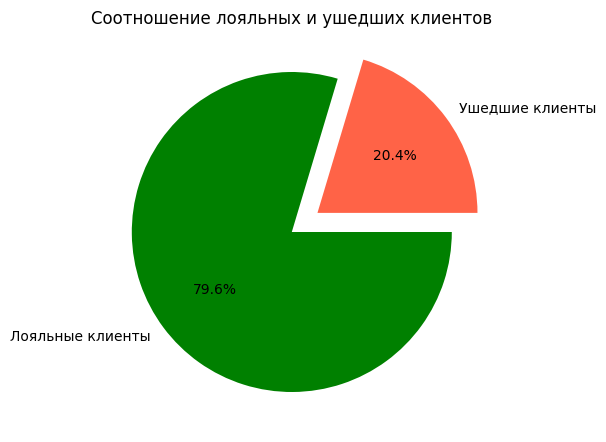

In [3]:
data1_df = pd.read_csv('data/data1_churn.csv')

exited_clients = data1_df[data1_df.Exited == 1].Exited.shape[0]
loyal_clients = data1_df.shape[0] - exited_clients

loyalty_pic = plt.figure(figsize=(4, 5))
axes = loyalty_pic.add_axes([0, 0, 1, 1])
axes.pie(
    x=[loyal_clients, exited_clients],
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    colors=['green', 'tomato'],
    autopct='%.1f%%',
    explode=[0, 0.2],
    shadow=False,
    counterclock=False
)
axes.set_title('Соотношение лояльных и ушедших клиентов');

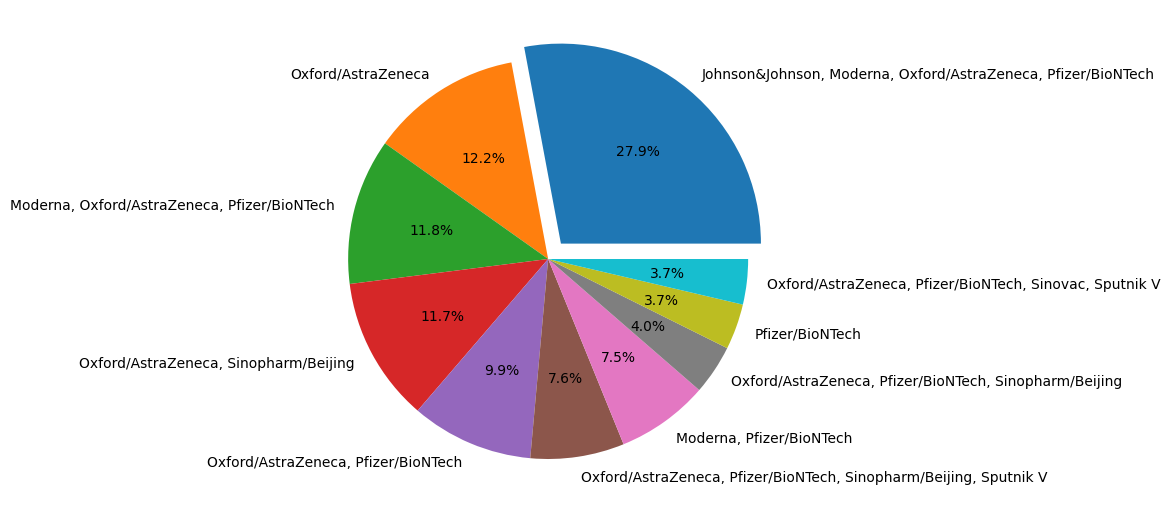

In [4]:
vaccin_df = virus_df['vaccines'].value_counts()[:10]

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccin_df,
    labels=vaccin_df.index,
    autopct='%.1f%%',
    explode=[0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

### Гистограмма численности значений признака ###

In [5]:
'''
import seaborn as sns

sns.countplot(
    data=data_df,
    x='Имя_признака'
);
'''

"\nimport seaborn as sns\n\nsns.countplot(\n    data=data_df,\n    x='Имя_признака'\n);\n"

### Гистограммы и боксы в разных сочетаниях ###

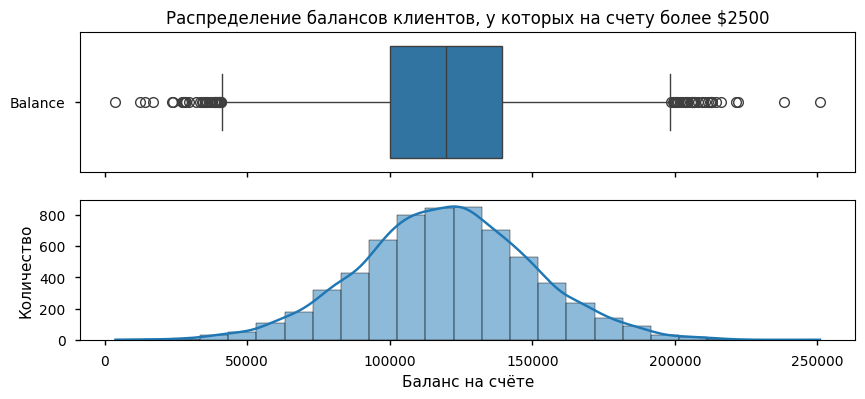

In [6]:
tmp_ser = data1_df[data1_df.Balance > 2500][['Balance']]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 4), sharex=True)
sns.boxplot(
    data=tmp_ser,
    orient='h',
    ax=ax1
)
sns.histplot(
    data=tmp_ser,
    bins=25,
    kde=True,
    legend=False,
    ax=ax2
)
ax1.set_title('Распределение балансов клиентов, у которых на счету более $2500')
ax1.set_xlabel('')
ax2.set_xlabel('Баланс на счёте')
ax2.set_ylabel('Количество');

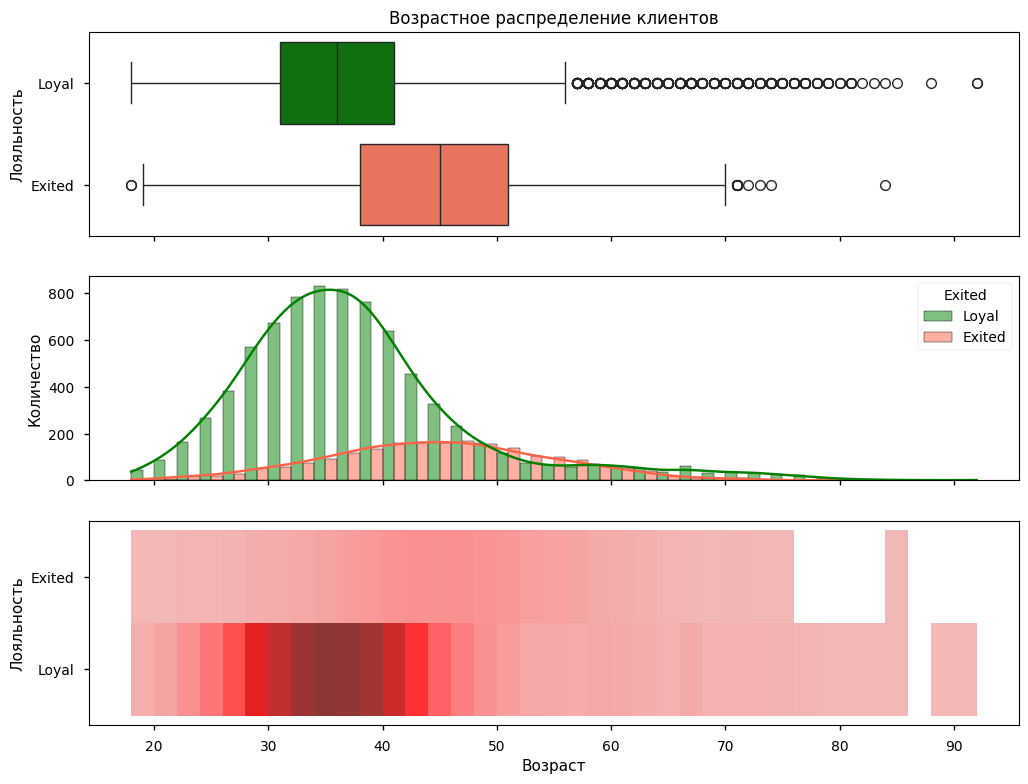

In [17]:
tmp_df = data1_df.copy()
tmp_df.Exited = tmp_df.Exited.apply(lambda x: 'Exited' if x == 1. else 'Loyal')

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12, 9), sharex=True)
sns.boxplot(
    data=tmp_df,
    x='Age',
    y='Exited',
    orient='h',
    order=['Loyal', 'Exited'],
    palette={'Loyal': 'green', 'Exited': 'tomato'},
    ax=ax1
)
sns.histplot(
    data=tmp_df,
    x='Age',
    hue='Exited',
    hue_order=['Loyal', 'Exited'],
    multiple='dodge',
    bins=37,
    kde=True,
    palette={'Loyal': 'green', 'Exited': 'tomato'},
    ax=ax2
)
sns.histplot(
    data=tmp_df,
    x='Age',
    y='Exited',
    bins=37,
    color='red',
    ax=ax3
)
ax1.set_title('Возрастное распределение клиентов')
ax1.set_xlabel('')
ax1.set_ylabel('Лояльность')
ax2.set_ylabel('Количество')
ax3.set_ylabel('Лояльность')
ax3.set_xlabel('Возраст');

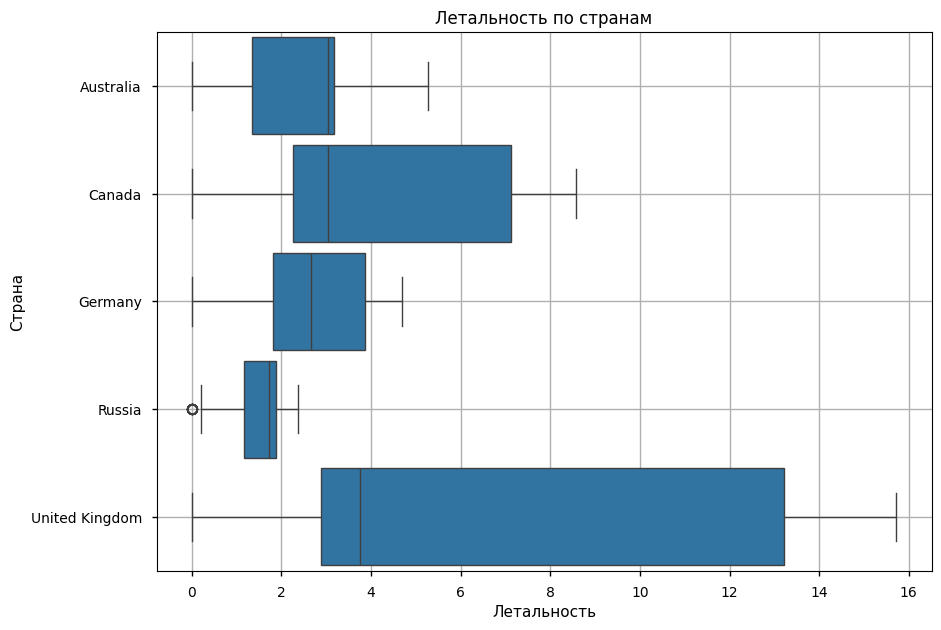

In [8]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_df = virus_df[virus_df['country'].isin(countries)]
populations = pd.DataFrame([['Canada', 37664517], ['Germany', 83721496], ['Russia', 145975300], ['Australia', 25726900], ['United Kingdom', 67802690]], columns=['country', 'population'])
croped_df = croped_df.merge(populations, on=['country'])
croped_df['daily_confirmed_per_hundred'] = croped_df['daily_confirmed'] / croped_df['population'] * 100

fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_df,
    x='death_rate',
    y='country',
    orient='h',
    width=0.9
)
boxplot.set_title('Летальность по странам')
boxplot.set_xlabel('Летальность')
boxplot.set_ylabel('Страна')
boxplot.grid();

### Столбы-бары ###

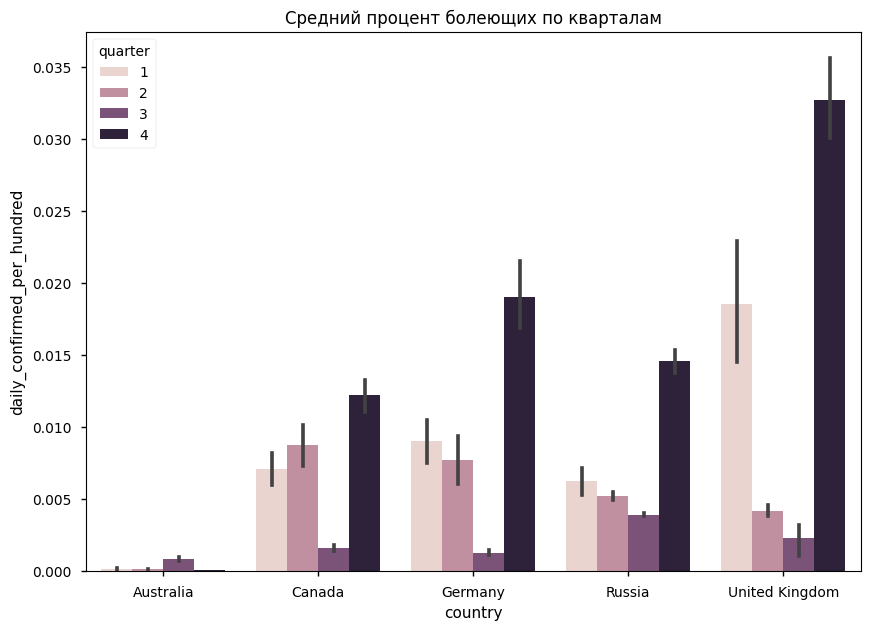

In [9]:
fig = plt.figure(figsize=(10, 7))
croped_df['quarter'] = croped_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter'
)
barplot.set_title('Средний процент болеющих по кварталам');

### Диаграммы рассеяния ###

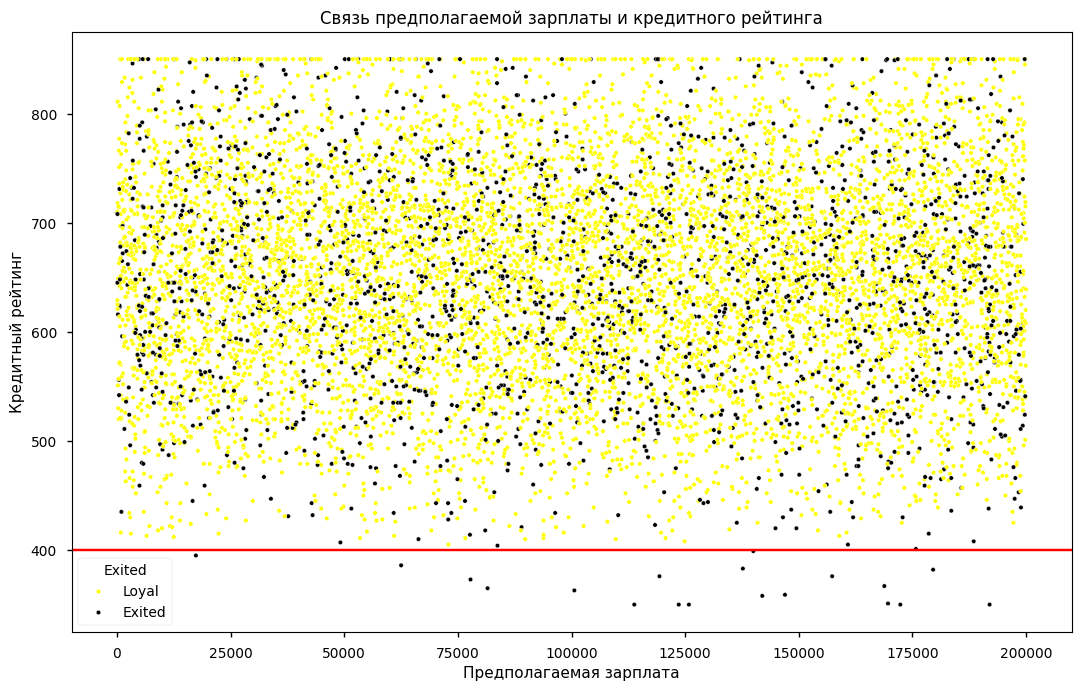

In [10]:
tmp_df = data1_df.copy()
tmp_df.Exited = tmp_df.Exited.apply(lambda x: 'Exited' if x == 1. else 'Loyal')

fig = plt.figure(figsize=(10, 6))
axes = fig.add_axes([0, 0, 1, 1])
sns.scatterplot(
    data=tmp_df,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Exited',
    hue_order=['Loyal', 'Exited'],
    s=10,
    palette={'Loyal': 'yellow', 'Exited': 'black'},
    ax=axes
)
axes.axhline(400, color='red')
axes.set_title('Связь предполагаемой зарплаты и кредитного рейтинга')
axes.set_xlabel('Предполагаемая зарплата')
axes.set_ylabel('Кредитный рейтинг');

### Тепловые карты ###

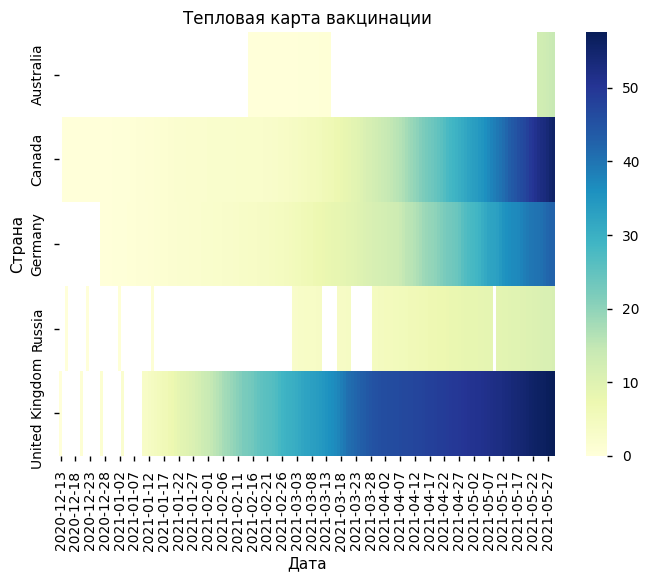

In [14]:
pivott_df = croped_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country'
)
pivott_df.columns = pivott_df.columns.astype('string')

heatmap = sns.heatmap(
    data=pivott_df,
    cmap='YlGnBu'
)
heatmap.set_title('Тепловая карта вакцинации')
heatmap.set_xlabel('Дата')
heatmap.set_ylabel('Страна');

### Q-Q Plot (Квантиль-квантиль график)

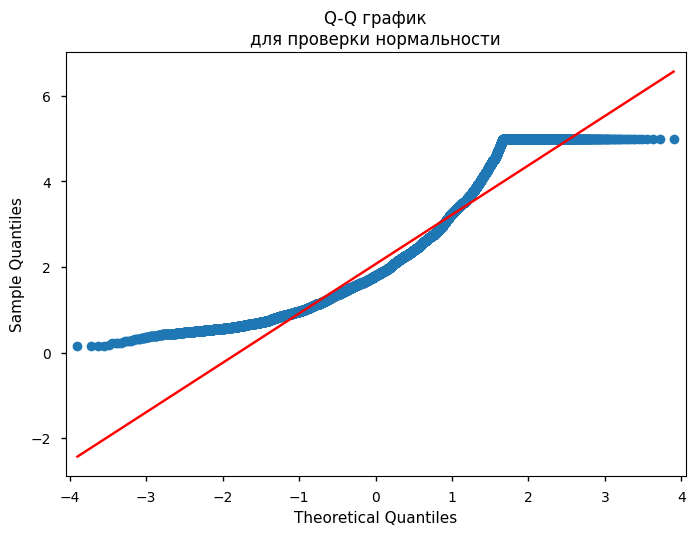

In [21]:
from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn import datasets
dataset = datasets.fetch_california_housing()
data = dataset.target    ##### data = Один признак из датасета

sm.qqplot(data, line='s')
plt.title('Q-Q график\nдля проверки нормальности')
plt.show()

Для нормального распределения отрисованный синий график должен максимально приближен к красной диагонали.

### Матрица корреляции ###

In [22]:
'''
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(dataset.corr(), annot=True);
'''

"\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport warnings\nwarnings.filterwarnings('ignore')\n%matplotlib inline\nplt.style.use('seaborn')\n\nfig, ax = plt.subplots(figsize=(8, 4))\nsns.heatmap(dataset.corr(), annot=True);\n"